# Read data

In [12]:
import pandas as pd
import numpy as np

In [13]:
# read train.csv
train_df = pd.read_csv("dataset/train.csv")
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
555281,id1681927,1,2016-02-25 13:28:10,2016-02-25 13:35:33,1,-73.967361,40.792953,-73.949257,40.785259,N,443
609210,id2446913,2,2016-02-02 21:18:22,2016-02-02 21:32:41,1,-73.991844,40.749962,-74.006584,40.708504,N,859
1377288,id3221937,1,2016-05-22 00:48:58,2016-05-22 00:55:01,3,-73.981567,40.773666,-73.994057,40.758713,N,363
108427,id1550421,1,2016-02-14 21:55:45,2016-02-14 22:01:35,1,-74.004227,40.752033,-73.997681,40.741047,N,350
239751,id1960464,2,2016-04-30 13:39:21,2016-04-30 13:51:32,3,-73.955223,40.778492,-73.981766,40.771271,N,731
942215,id0314742,2,2016-01-15 18:24:23,2016-01-15 18:38:59,1,-73.978516,40.761784,-73.988441,40.738548,N,876
696336,id0760177,1,2016-02-26 12:56:06,2016-02-26 13:14:08,1,-73.960663,40.775871,-73.975746,40.752804,N,1082
508183,id1672145,1,2016-04-22 09:16:29,2016-04-22 09:22:20,1,-73.952034,40.781448,-73.957275,40.778454,N,351
219187,id3647152,1,2016-01-05 23:40:33,2016-01-05 23:52:45,1,-73.991302,40.750111,-73.974854,40.729683,N,732
1052658,id0826037,1,2016-05-10 22:55:06,2016-05-10 23:32:04,1,-73.988388,40.749744,-73.774559,40.763218,N,2218


In [14]:
# read test.csv
test_df = pd.read_csv("dataset/test.csv")
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
175127,id3340053,1,2016-05-10 07:33:36,1,-73.983192,40.750332,-73.981911,40.732880,N
157787,id3005687,1,2016-05-14 22:28:27,1,-73.947128,40.744827,-73.947128,40.744827,N
555426,id2081365,2,2016-01-22 08:43:48,6,-73.974152,40.747276,-74.008186,40.737648,N
478333,id3456712,1,2016-02-14 21:18:04,1,-73.983696,40.726799,-73.986748,40.733902,N
61850,id3366843,1,2016-06-12 01:52:14,1,-74.004189,40.720333,-73.972198,40.610352,N
307023,id0474719,2,2016-04-03 04:15:03,1,-73.962753,40.758652,-73.946419,40.783119,N
144872,id1194335,1,2016-05-18 16:09:14,1,-73.964409,40.767265,-73.994743,40.760254,N
420061,id1648585,1,2016-03-02 14:37:57,1,-73.985161,40.750458,-73.977966,40.751308,N
408102,id1270008,2,2016-03-05 15:58:16,1,-73.978043,40.778770,-73.975471,40.787979,N
82872,id1757473,1,2016-06-06 02:41:14,1,-74.002777,40.733742,-73.988243,40.759541,N


In [15]:
# explore train.csv
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# preprocessing data

In [16]:
def preprocessing(data_df):
    # remove any rows with missing data
    data_df = data_df.dropna()

    # convert pickup and dropoff datetime to datetime format
    data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
    data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])

    # split datetime into month, day, week and hour
    data_df['day'] = data_df['pickup_datetime'].dt.day
    data_df['hour'] = data_df['pickup_datetime'].dt.hour
    data_df['month'] = data_df['pickup_datetime'].dt.month
    data_df['week'] = data_df['pickup_datetime'].dt.dayofweek
    return data_df


In [17]:
train_df = preprocessing(train_df)
test_df = preprocessing(test_df)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,month,week
1299556,id0695548,2,2016-01-08 16:16:33,2016-01-08 16:22:31,6,-73.981491,40.780842,-73.976311,40.791641,N,358,8,16,1,4
61788,id2202456,1,2016-06-16 21:07:41,2016-06-16 21:27:11,1,-73.996819,40.731689,-73.983330,40.765320,N,1170,16,21,6,3
42414,id2035639,2,2016-06-13 16:36:46,2016-06-13 16:57:01,5,-73.972351,40.759766,-73.989983,40.762074,N,1215,13,16,6,0
351936,id1605520,2,2016-06-27 21:24:35,2016-06-27 21:31:31,1,-73.975143,40.752266,-73.978920,40.736286,N,416,27,21,6,0
848062,id2091039,2,2016-06-12 16:37:19,2016-06-12 16:50:10,6,-73.971527,40.750530,-73.872643,40.774529,N,771,12,16,6,6
846333,id3426703,2,2016-05-17 07:40:35,2016-05-17 07:49:33,1,-73.958168,40.774509,-73.947899,40.772820,N,538,17,7,5,1
861355,id2280789,1,2016-03-16 14:32:03,2016-03-16 14:50:51,1,-73.994736,40.750237,-73.974030,40.762772,N,1128,16,14,3,2
687880,id2565758,1,2016-05-25 20:04:17,2016-05-25 20:15:08,2,-74.006783,40.730770,-73.985100,40.727615,N,651,25,20,5,2
137343,id3421120,1,2016-02-25 09:13:45,2016-02-25 09:23:07,1,-73.994095,40.751144,-73.980461,40.765636,N,562,25,9,2,3
684620,id3226410,2,2016-06-01 23:56:21,2016-06-02 00:01:01,1,-73.993690,40.720901,-74.003738,40.722511,N,280,1,23,6,2


# data Analysis & visualization 

In [98]:
import matplotlib.pyplot as plt
def plot_histogram(data_df, column_name):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
    
    ax = data_df[column_name].value_counts().plot(kind='bar',title=column_name,ax=axes,color = ('blue',(1, 0.5, 0.13)))
    # make the color uquie
    #data_df[column_name].hist(bins=bins)
    ax.set_ylabel("Count")
    ax.set_xlabel("Vendor Id")
    fig.tight_layout()


## vendor_id

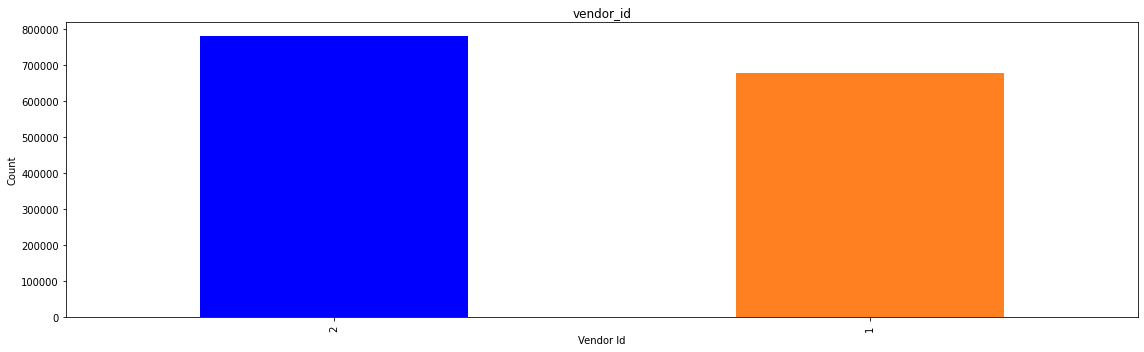

In [99]:
# plot histogram of vendor_id
plot_histogram(train_df, "vendor_id")

* there are only two vendor_id in the data set, 1 and 2
* vendor_id 2 has more trips than vendor_id 1

## passenger_count

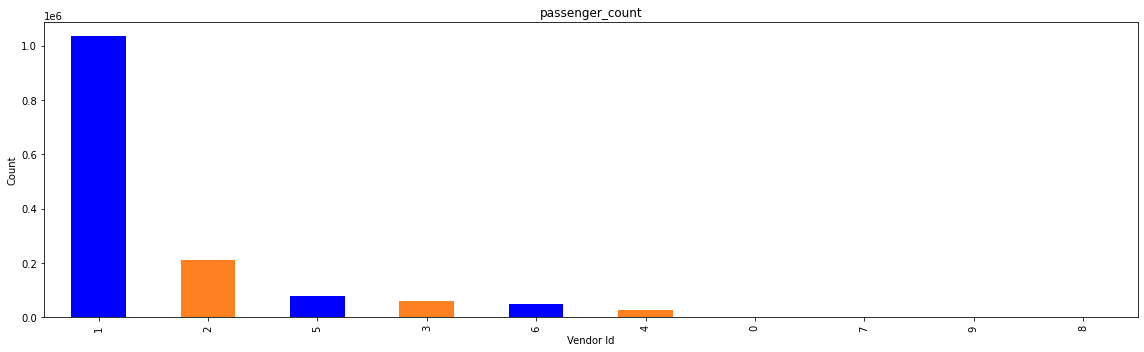

In [100]:
plot_histogram(train_df, "passenger_count")

* Most of the trips have 1 or 2 passengers

## trip_duration

In [107]:
def plot_range_hist(df, col, bins=10):
    plt.figure(figsize=(12, 6))
    plt.hist(df[col], bins=bins, range=[0, 100])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)
    plt.show()

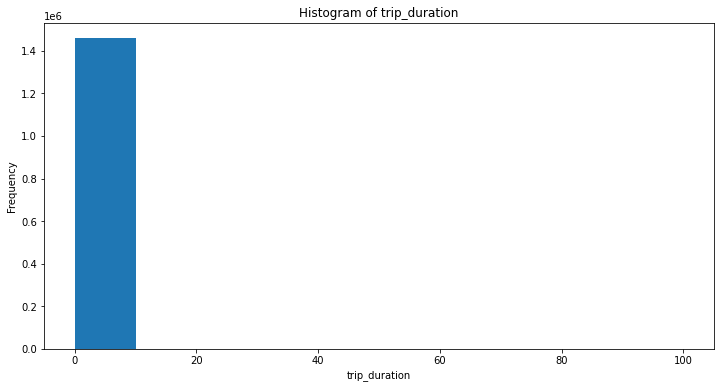

count    1.458644e+06
mean     4.442094e-03
std      2.424737e-02
min      4.629630e-06
25%      1.837963e-03
50%      3.064815e-03
75%      4.976852e-03
max      1.632538e+01
Name: trip_duration, dtype: float64

In [108]:
plot_range_hist(train_df, "trip_duration")
# print summary statistics of trip_duration
train_df['trip_duration'].describe()